In [34]:
import pandas as pd

heart = pd.read_csv('heart.csv')

In [35]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [36]:
def trestbps (row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return 123
        if row['age'] >= 21 and row['age'] <= 30:
            return 126
        if row['age'] >= 31 and row['age'] <= 40:
            return 129
        if row['age'] >= 41 and row['age'] <= 50:
            return 135
        if row['age'] >= 51 and row['age'] <= 60:
            return 142
        else:
            return 142
    else:
        if row['age'] <= 20:
            return 116
        if row['age'] >= 21 and row['age'] <= 30:
            return 120
        if row['age'] >= 31 and row['age'] <= 40:
            return 127
        if row['age'] >= 41 and row['age'] <= 50:
            return 137
        if row['age'] >= 51 and row['age'] <= 60:
            return 144
        else:
            return 159
        
        
heart['trestbps_mean'] = heart[['sex', 'age']].apply(trestbps, axis = 1)

heart
        
        

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [37]:
import category_encoders as ce
import pandas as pd

encoder = ce.OneHotEncoder(cols = ['cp', 'restecg', 'slope', 'ca', 'thal'])
heart_enc = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, heart_enc], axis = 1)


In [38]:
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis = 1)
heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


In [39]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

scaler = preprocessing.RobustScaler()
names = heart.columns
scaler_2 = scaler.fit_transform(heart)
scaled_heart = pd.DataFrame(scaler_2, columns= names)

scaled_heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,0.0,0.75,-0.110236,1.0,-0.092308,0.0,0.9375,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,-1.333333,0.0,0.00,0.157480,0.0,1.046154,0.0,1.6875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.00,-0.566929,0.0,0.584615,0.0,0.3750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.074074,0.0,-0.50,-0.062992,0.0,0.769231,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.50,1.795276,0.0,0.307692,1.0,-0.1250,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,0.50,0.015748,0.0,-0.923077,1.0,-0.3750,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
299,-0.740741,0.0,-1.00,0.377953,0.0,-0.646154,0.0,0.2500,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
300,0.962963,0.0,0.70,-0.740157,1.0,-0.369231,0.0,1.6250,-1.0,1.0,...,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
301,0.148148,0.0,0.00,-1.716535,0.0,-1.169231,1.0,0.2500,-1.0,0.0,...,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0


In [40]:
! pip install scipy


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot: >

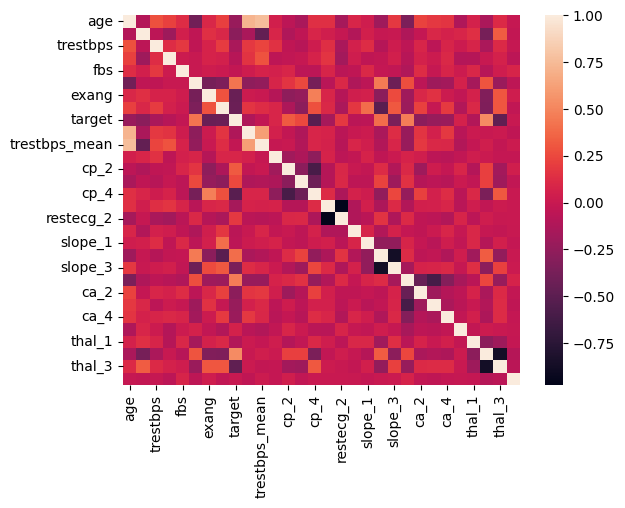

In [41]:
import seaborn as sns

sns.heatmap(scaled_heart.corr(numeric_only=True))

In [42]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.414
Распределение нормальное


In [43]:
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})

data

,group,object_id,value
0,Заряд,1,36
1,Заряд,2,45
2,Заряд,3,41
3,Заряд,4,41
4,Заряд,5,35
5,Планета,1,32
6,Планета,2,34
7,Планета,3,42
8,Планета,4,48
9,Планета,5,43


In [44]:
import scipy.stats as stats
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
alpha = 0.05
_, p= stats.ttest_1samp(data, popmean = 40, alternative =  'less')
print(p)


0.017654336324693175


In [45]:
data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
data_south = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]
data_east = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]

alpha = 0.05
result = stats.f_oneway(data_east, data_north, data_south)
p = result[1]
p

0.001826823657531684

In [46]:
data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

alpha = 0.05

_, p =  stats.ttest_rel(data_before, data_after, alternative= 'greater')

p


0.21286466306459068

In [47]:
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

alpha = 0.05

_, p = stats.wilcoxon(data_before, data_after, alternative='less')

p

c:\Users\Администратор\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


0.7419350305909402

In [48]:
from statsmodels.stats.descriptivestats import sign_test

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]
alpha = 0.05
_, p = sign_test(data, 75)

p

0.13604594767093658

In [49]:
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

alpha = 0.05

_, p = stats.kruskal(data_tariffs,  data_offers, data_support)
p

7.044396034032787e-07

In [51]:
from statsmodels.stats.contingency_tables import mcnemar

In [53]:


data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])

table = pd.crosstab(data['Старая форма'], data['Новая форма'])
table

res = mcnemar(table)
p = res.pvalue

p

0.03515625